In [4]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

def calcData(sheet1):
    placedStatus,placementPackage=sheet1['Placed'],sheet1['Max Package']
    placementPackage.fillna(0.0,inplace=True)
    placedStatus.fillna('Not Placed',inplace=True)
    count=[0]*4
    for i in placementPackage[placedStatus=='Placed']:
        if i>6.0:
            count[0]+=1
        elif i<=6 and i>4:
            count[1]+=1
        elif i<=4 and i>=2:
            count[2]+=1
        elif i<2:
            count[3]+=1
        else:
            print(i,'errorsome value')
    total=sum(count)
    percentages=[]
    for i in count:
        percentages.append(i*100/total)
    return(count,percentages)


xl=pd.ExcelFile('RAW FINAL CGPA Vs Package Report of 2018,2017,2016 (14-feb-18).xlsx')
sheet1=xl.parse(0)
sheet2=xl.parse(1)
sheet3=xl.parse(2)
count1,countp1=calcData(sheet1)
count2,countp2=calcData(sheet2)
count3,countp3=calcData(sheet3)
categories=[' ','Z - More than 6 LPA','A - Between 4 and 6 LPA','B- Between 2 and 4 LPA','C - Less than 2 LPA']
total=sum(count1)
cp1=['% out of Total ('+str(total)+')']+countp1
total=sum(count2)
cp2=['% out of Total ('+str(total)+')']+countp2
total=sum(count3)
cp3=['% out of Total ('+str(total)+')']+countp3

c1=['No. of students']+count1
c2=['No. of students']+count2
c3=['No. of students']+count3
tabData=pd.DataFrame(np.column_stack([ c1, cp1,c2,cp2,c3,cp3]),
              columns=['2018','2018','2017','2017','2016','2016'],index=[categories])
print(tabData)

writer = ExcelWriter('Student Placement Package Data.xlsx')
tabData.to_excel(writer,'Sheet1')
writer.save()



                                    2018                   2018  \
                         No. of students  % out of Total (1109)   
Z - More than 6 LPA                   88       7.93507664562669   
A - Between 4 and 6 LPA              231     20.829576194770063   
B- Between 2 and 4 LPA               679       61.2263300270514   
C - Less than 2 LPA                  111     10.009017132551849   

                                    2017                   2017  \
                         No. of students  % out of Total (1854)   
Z - More than 6 LPA                   53      2.858683926645092   
A - Between 4 and 6 LPA              189     10.194174757281553   
B- Between 2 and 4 LPA              1492      80.47464940668824   
C - Less than 2 LPA                  120      6.472491909385114   

                                    2016                   2016  
                         No. of students  % out of Total (1787)  
Z - More than 6 LPA                   14     0.783435926133184

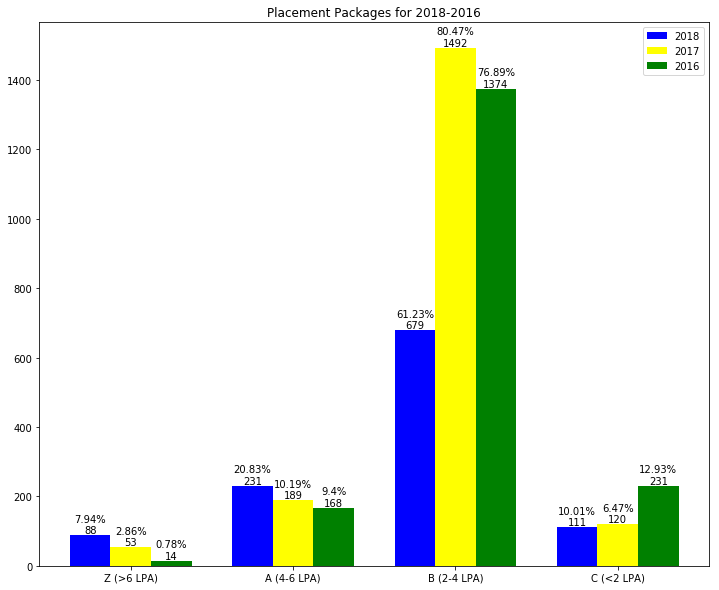

In [11]:
import matplotlib.pyplot as plt
import numpy as np
labels=['Z (>6 LPA)','A (4-6 LPA)','B (2-4 LPA)','C (<2 LPA)']
x = np.arange(4)
fig = plt.figure(figsize=(12,10))

ax = plt.subplot(111)
bar1=ax.bar(x - 0.25, count1, color = 'b', width = 0.25,label='2018')
bar2=ax.bar(x + 0.00, count2, color = 'yellow', width = 0.25,label='2017')
bar3=ax.bar(x + 0.25, count3, color = 'g', width = 0.25,label='2016')
j,allCounts,allPercentages=0,count1+count2+count3,countp1+countp2+countp3
for rect in bar1 + bar2 + bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, str(round(allPercentages[j],2))+'%\n'+str(allCounts[j]), ha='center', va='bottom')
    j+=1
plt.legend()
plt.title('Placement Packages for 2018-2016')
plt.xticks(x,labels)
plt.savefig('3yrbarplotPlacements.png',transparent=True)
plt.show()


##### 